### <center> ***Μέθοδοι βελτιστοποίησης 2022*** <br> Aπαλλακτική εργασία


1. Περιγράψετε το μοντέλο της ridge regresiion (α) σαν regularization της γραμμικής παλινδρομησης και (β) σαν προβλημα βελτιστοποίησης υπο περιορισμούς και δείξτε την σχέση τους.<br>
2. Βρείτε το δύικο πρόβλημα του 1(β) <br>
3. Περιγράψτε και υλοποιείστε τον αλγόριθμο της βαθμίδας και του projected αλγορίθμου βαθμίδας για τα προβλήματα 1(α) και 1(β) αντιστοίχως καθώς και τις παραλλαγές του (π.χ. stochastic gradient descent κλπ). Μπορείτε να χρησιμοποιήσετε προσομοιωμένα δεδομένα ή /και πραγματικά δεδομένα της επιλογής σας. <br>
4. Περιγράψτε και υλοποιείστε τον αλγόριθμο του Νεύτωνα για το προβλημα 1(α) και κάποιες παραλλαγές του (π.χ. χυασι-Νεωτον). <br>
5. Χρησιμοποιείστε το δυικό του προβλήματα 1(β) και προτείνετε ένα εναλλακτικό τρόπο επίλυσης του πρωτεύοντος προβλήματος.

#### <center> <u>Λύση</u> :

Η μέθοδος <u>ridge regression</u> είναι ένας αλγόριθμος ο οποίος χρησιμοποιείται για την ανάλυση δεδομένων τα οποία αντιμετωπίζουν διάφορα προβλήματα όπως το να μην είναι bias η μέθοδος ελαχίστων τετραγώνων ή η διακύμανση να είναι είναι μεγάλη, οπότε και αδυνατούμε να κάνουμε σωστές προβλέψεις, καθώς αυτές θα είναι μακριά (ίσως αρκετά) απο τις πραγματικές τιμές.

Άξίζει, όμως, να δούμε την προβληματική αυτή μέσα από ένα παράδειγμα.

Υποθέστε πως έχουμε να δημιουργήσουμε ένα μοντέλο πρόβλεψης του ύψους ενός ανθρώπου με βάση το βάρος αυτού. Να σημειωθεί ότι για την επιλυση αυτού του προβλήματος θα χρησιμοποιήσουμε γραμμική παλινδρόμηση. 

Έτσι, θα είχαμε μια εξίσωση της μορφής <br>
<center> $Y = α + βX$ <br>
</center>δηλαδή για την δικιά μας περίπτωση <br>
<center> Ύψος $ = α + β * $ Βάρος <br>
</center> Οπότε ας υποθέσουμε ότι το γράφημα της γραμμικής παλινδρόμησης θα ήταν κάπως έτσι:

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
weight = [1,2,3,3,5,6,7]
height = [3,2,3,4,4,6,5]

Text(0.5, 1.0, 'Example of Linear Regression')

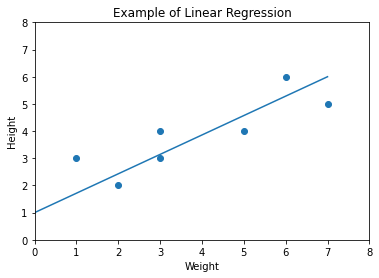

In [6]:
plt.plot([0,7],[1,6])
plt.scatter(weight, height)
plt.xlim(0,8)
plt.ylim(0,8)
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Example of Linear Regression")

Στην περίπτωση αυτή, τα πράγματα πάνε αρκετά καλά! Τι θα συνέβαινε όμως εάν είχαμε μόνο 2 σημεία? Τότε η γραμμική παλινδρόμηση, θα μας έδινε ένα αποτέλεσμα κάπως έτσι:

Text(0.5, 1.0, 'Bad Example of Linear Regression')

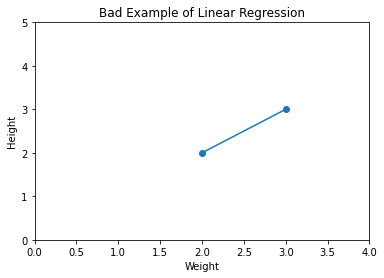

In [7]:
plt.plot([2,3],[2,3])
plt.scatter([2,3], [2,3])
plt.xlim(0,4)
plt.ylim(0,5)
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Bad Example of Linear Regression")

 Το αποτέλεσμα αυτό σίγουρα δεν είναι ένα καλό μοντέλο πρόβλεψης της τιμής του ύψους κάποιου ανθρώπου δεδομένου του βάρους του. Σε αυτό το σημείο είναι που έρχεται η αλγοριθμός/μέθοδος **ridge regression** να μας λύσει τα χέρια. Αλλα ας τα πάρουμε με την σειρά για να δουμε τις διαφορές και πώς η μέθοδος **ridge regression** θα μας βοηθήσει για να έχουμε ένα καλύτερο αποτέλεσμα δεδομένων των συνθηκών (μόλις δύο σημεία).

Αρχικά, ο τρόπος με τον οποίο η μέθοδος **<u>Least Square</u>** υπολογίζει τις τιμές για την δημιουργία της γραμμικής παλινδρόμησης είναι ελαχιστοποιώντας το τετραγωνικό άθροισμα των "σφαλμάτων" (σφάλματα := οι διαφορές της εκτιμώμενης γραμμής απο τα πραγματικά σημεία) και έπειτα τετραγωνίζοντας το. Στο παράδειγμά μας, όπου έχουμε μόνο δύο σημεία, τα σφάλματα είναι μηδέν και έτσι, θεωρητικά, η πρόβλεψή μας είναι τέλεια. Αν δούμε, όμως, όλα μαζί τα σημεία και την "τέλεια" πρόβλεψη μας θα δουμε ότι τελικά.. δεν είναι και τόσο τέλεια:

Text(0.5, 1.0, 'Bad Example of Linear Regression')

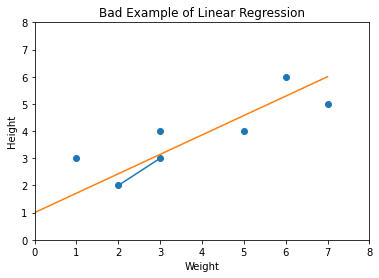

In [8]:
plt.plot([2,3],[2,3])
plt.plot([0,7],[1,6])
plt.scatter(weight, height)
plt.xlim(0,8)
plt.ylim(0,8)
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Bad Example of Linear Regression")

Μπορεί κανείς να δει ότι η "τέλεια" (μπλέ) γραμμή δεν είναι και τόσο τέλεια τελικά. Σε αυτό το σημείο είναι που ο αλγόριθμός ridge regression έρχεται να μας βοηθήσει να διορθώσουμε την κατάσταση. Μέσω του αλγορίθμου αυτού, προσθέτουμε στην μέθοδο υπολογισμού της εκτιμώμενης γραμμής (πρόβλεψης) τον όρο <br> 
<center> $λ*β^2$ <br>
</center> όπου το $β$ είναι η κλίση της εκτίμησης του μοντέλου, έτσι ώστε να δώσει κάποια κλίση για να διορθώσει το λάθος που κάναμε. Έτσι, ο αλγόριθμός **ridge regression** ουσιαστικά υπολογίζει το άθροισμα των τετραγώνων των σφαλμάτων, προσθέτοντας στο αποτέλεσμα αυτό τον προαναφερόμενο όρο $λ*β^2$. 

Αφού πλέον έχουμε καταλάβει πώς λειτουργεί ο εν λόγω αλγόριθμός είμαστε σε θέση, να τον ορίσουμε σαν μορφή regularization ενός γραμμικού προβλήματος.

Επομένως, εαν υποθέσουμε ότι το γραμμικό μοντέλο είναι αυτό της μορφής:<cd>
<center> $ y = w_1 x_1 + w_2 x_2 + \dots + w_n x_n $ <cd>
</center> για να βρούμε την τυπική γραμμική παλινδρόμηση με χρήση όρων regularization θα πρέπει να λύσουμε το πρόβλημα ελαχιστοποίησης με μορφή:<cd>
<center> $arg\min_w (\frac{1}{2}\sum_{i=1}^n ( x_i * w - y_i )^2 + \frac{\lambda}{2}\sum_{i=1}^n || w_i ||^2$

Έχουμε λοιπόν, σε μορφή πινάκων, τα εξής:

$$Y = \begin{bmatrix} 
y_1 \\ 
y_2 \\ 
\vdots \\
y_n \\
\end{bmatrix}$$

$$X = \begin{bmatrix} 
x_1 \\
x_2 \\
\vdots \\
x_n \\ 
\end{bmatrix}$$

καθώς επίσης 

$$w = \begin{bmatrix} 
w_1 \\ 
w_2 \\ 
\vdots \\
w_n \\
\end{bmatrix}$$

Τώρα είμαστε σε θέση να παρουσιάσουμε την παραπάνω μορφή με την βοήθεια των πινάκων και κατ' επέκτασην ως μορφή προβλήματος βελτιστοποίησης χωρίς περιορισμούς

$$ \min_\beta ||X^Tw - Y ||^2 + \lambda|| w ||^2 $$

Σκοπός του παραπάνω προβλήματος είναι να βρούμε το $ B $ το οποίο ελαχιστοποιεί την παράσταση. Για να το πετύχουμε αυτό ακολουθούμε τα παρακάτω βήματα:

<center> $ (Xw-y)^T(Xw-Y) + \lambda B^T B \Leftrightarrow$</center> <br>
<center> $ y^Ty - 2wX^Ty + w^TX^TXw + \lambda w^Tw \Leftrightarrow$</center> <br>
και παραγοντοποιώντας ως προς $w$ έχουμε <br>
    
<center> $ \frac{\partial y^Ty - 2wX^Ty + w^TX^TXw + \lambda w^Tw}{\partial w} \Leftrightarrow$</center> <br>
<center> $ -2X^Ty + 2X^TXw + 2\lambda w $</center> <br>
    
Για να βρούμε τα ακρότατα, θα πρέπει να μηδενίσουμε την παραπάνω παράσταση <br>
    
<center> $ -2X^Ty + 2X^TXw + 2\lambda w = 0 \Leftrightarrow $</center> <br>
<center> $ -X^Ty + X^TXw + \lambda w = 0 \Leftrightarrow $</center> <br>
<center> $ X^Ty = X^TXw + \lambda w $</center> <br>
<center> $ X^Ty = (X^TX + \lambda I)w $</center> <br>
<center> $ w = (X^TX + \lambda )^-1 X^Ty $</center> <br>
    
και έτσι μπορέσαμε και βρήκαμε την κλίση που θα έχει η γραμμική παλινδρόμηση με χρήση του αλγορίθμου **ridge regression**.

Το παραπάνω πρόβλημα βελτιστοποίησης δεν είναι εφικτό να επεξεργαστεί για να βρούμε το δυϊκο αυτού, καθώς είναι ένα πρόβλημα (ελαχιστοποίησης) χωρίς περιορισμούς. Ως εκ τούτου, Θα πρέπει να προσθέσουμε κάποιες "χαζές" μεταβλητές (γνωστές και ως dummy variables) για να πετύχουμε το στόχο μας, δηλαδή να υπολογίσουμε το δυϊκο του παραπάνω προβλήματος. Θεωρώ: <br>

$$z = Xw - y$$ 

Άρα έχουμε το ακόλουθο πρόβλημα γραμμικού προγραμματισμού με περιορισμούς:

$$min_{B,z}||z||^2 + \lambda||w||$$ <br>

Yπό τις προϋποθέσεις:

$$ z = Xw - y $$

Mε αυτόν τον τρόπο, είμαστε πλέον σε θέση να υπολογίσουμε το δυϊκό πρόβλημα του παραπάνω. Να σημειωθεί ότι δεν υπάρχουν μεταβλητές τις οποίες θα πρέπει να θέσουμε όσον αφορά το $\lambda$, αφού δεν υπάρχουν και περιορισμοί για αυτό. Συνεπώς, έχουμε την ακόλουθη Λανγκρανζιανή (Langragian) μορφή: <br>

$$ \mathcal{L}(B,z,\alpha) = ||z||^2 + \lambda||w||^2 + a^T(Xw - y - z)$$

και κατ' επέκταση, το δυϊκό πρόβλημα αυτού είναι το <br>

$$ max_\alpha g(\alpha )$$ <br>

τέτοιο ώστε <br>

$$ g(\alpha) = min_{B,z} ||z||^2 + \lambda ||w||^2+a^T(Xw - y - z )$$

Για να δείξουμε ότι η βέλτιστη δυνατή λύση του δυϊκού προβλήματος είναι και βέλτιστη δυνατή λύση για το αρχικό πρόβλημα βελτιστοποίησης θα πρέπει να αποδείξουμε ότι ισχύουν οι προϋποθέσεις Karush Kuhn Tucker (KKT Conditions). Η συγκεκριμένη, όμως, απόδειξη είναι εκτός του πεδίου ενδιαφέροντος της παρούσας εργασίας.

Συνεχίζοντας, για να ερευνήσουμε σε βάθος τη μέθοδο της βαθμίδας (gradient descent), θα πρέπει να δώσουμε κάποιους ορισμούς, ώστε να είμαστε όλοι σε θέση να κατανοήσουμε πλήρως τα βήματα του αλγορύθμου.

Έστω συνάρτηση $f$ τέτοια ώστε: <br>

$$f : D \subset \mathcal{R}^d \rightarrow \mathcal{R}$$ <br>

Ορίζουμε τη βαθμίδα της συνάρτησης $f$ στο σημείο $x \in D$ να είναι η <br>

$$Df(x) = (\frac{\partial f}{\partial x_1}(x), \frac{\partial f}{\partial x_2}(x), \dots \frac{\partial f}{\partial x_d}(x))$$

Η βαθμίδα είναι χρήσιμη, καθώς μας δίνει την κατεύθυνση της μεταβολής της $f$. Σε αυτό το σημείο, χρειάζεται να αναφέρουμε ένα θεώρημα, το οποίο θα μας βοηθήσει να αναγνωρίσουμε τα τοπικά ακρότατα.<br>
    
**<u>Θεώρημα</u>:**<br>
Έστω $f : D \subset \mathcal{R}^d \rightarrow \mathcal{R}$ η οποία είναι συνεχής και παραγωγίσιμη (δηλαδή $C^1$ συνάρτηση), τότε το σημείο $x^* \in D$ είναι ένα τοπικό ακρότατο της f αν και μόνο αν είναι κρίσιμο σημείο, δηλαδή <br>

$$Df(x^*)= 0$$

Έχουμε, λοιπόν, τις εξής περιπτώσεις όταν το $x^*$ είναι τοπικό ακρότατο:

1. $x^*$ τοπικό ελάχιστο αν $D^2f(x^*)$ θετικά ορισμένο
2. $x^*$ τοπικό μέγιστο αν $D^2f(x^*)$ αρνητικά ορισμένο
3. Σε κάθε άλλη περίπτωση το $x^*$ ονομάζεται σαγματικό σημείο.

Η μέθοδος gradient descent (γνωστή και ως steepest descent) ουσιαστικά χρησιμοποιεί την πιο απότομη αλλαγή, σύμφωνα με τις παραγώγους (steepest), με απώτερο σκοπό να βρει το βέλτιστο σημείο. Εδώ, θα πρέπει να αναφερθεί ότι ο αλγόριθμος δεν εγγυάται ότι το βέλτιστο σημείο θα είναι και ολικό (μπορεί να είναι τοπικό ή ολικό). Για την χρήση της μεθόδου, η μερική παράγωγος της συνάρτησης θα πρέπει να υπολογιστεί. Άρα, έχουμε το ακόλουθο: <br>

$$\triangledown f(x) = f'(x)$$ <br>

Χρησιμοποιώντας τον αλγόριθμο, το βέλτιστο σημείο λαμβάνεται όταν η κλίση (slope) της παραγώγου είναι μηδέν. Σύμφωνα με τις αρχές του μοντέλου gradient descent, η ελάχιστη τιμή της συνάρτησης, και κατ' επέκτασην η βέλτιστη λύση (για ένα πρόβλημα ελαχιστοποίησης), λαμβάνεται εάν η κατεύθυνση αναζήτησης είναι αντίθετη απά αυτήν της παραγώγου και, αντιστρόφως, η μέγιστη τιμή λαμβάνεται εάν η κατεύθυνση αναζήτησης είναι παρόμοια με αυτή της παραγώγου της συνάρτησης. Για να ξεκινήσουμε την αναζήτηση του βέλτιστου σημείου θα πρέπει να γίνει επιλογή ενός αρχικού $x_0$ αφετηριακού σημείου. Συνεπώς, για ένα πρόβλημα ελαχιστοποίησης, η κατεύθυνση αναζήτησης θα πρέπει να γίνει προς την κατεύθυνση <br>

$$-\triangledown f(x_0)$$

Πλέον, χρησιμοποιώντας τον αλγόριθμο gradient descent, ένα νέο σημείο $x_1$ μπορεί να βρεθεί και στην γενική περίπτωση, ένα νέο σημείο $x_{i+1}$ μπορεί να βρεθεί με την βοήθεια της εξίσωσης:<br>

$$x_{i+1} = x_i - \rho_i\triangledown f(x_i), \quad \rho_i > 0$$

Για την καλύτερη κατανόηση της λειτουργίας του αλγορίθμου, αξίζει να δώσουμε ένα παράδειγμα.

Θα προσπαθήσουμε, λοιπόν, να βρούμε το ελάχιστο σημείο της συνάρτησης $y = x^2$. Από το γράφημα και μόνο, μπορεί κανείς να βρει τη βέλτιστη λύση, καθώς το συγκεκριμένο πρόβλημα δεν είναι τόσο δύσκολο, ώστε να απαιτείται η χρήση υπολογιστικής βοήθειας. Ωστόσο, θυμηθείτε ότι η επίλυση αυτού του προβλήματος έχει ως σκοπό την κατανόηση του αλγορίθμου και του πώς αυτός λειτουργεί και όχι να μας δείξει την ικανότητα και το benchmark του συγκεκριμένου αλγορίθμου. Αρχικά ας την λύσουμε, "συμβατικά" όπως θα την λύναμε χωρίς τη χρήση του υποπολογιστή. Ας δούμε την γραφική αναπαράσταση αυτής. 

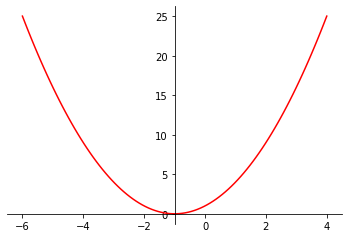

In [6]:
# 100 linearly spaced numbers
x = np.linspace(-6,4,100)

# the function, which is y = x^2 here
y = (x+1)**2

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x,y, 'r')

# show the plot
plt.show()

Βλέπουμε απευθείας το ελάχιστο της συνάρτησης αυτής, αλλά πάμε να δούμε πώς θα χρησιμοποιούσαμε και τον αλγόριθμο χωρίς τη χρήση υπολογιστή. <br>

Ας ξεκινήσουμε με το σημείο $x_0 = 3$ και $\rho_k = \rho = 0.001$. Από τη στιγμή που έχουμε ένα αφετηριακό σημείο, για να ξεκινήσουμε τη λειτουργία του αλγορίθμου, θα πρέπει να υπολογίσουμε την παράγωγο της συνάρτησης. 'Αρα <br>

$$\frac{\partial y}{x} = \frac{\partial (x+1)^2}{x} = 2(x+1)$$<br>

Έτσι, έχουμε ό,τι χρειαζόμαστε για να ξεκινήσουμε τη χρήση του αλγορίθμου και την εύρεση του βέλτιστου δυνατού σημείου. <br>

#### <center> $\underline{Πρώτη Επανάληψη}$ </center> <br>

$$x_1 = 3 - 0.001\cdot[2(3 + 1)] \Leftrightarrow$$
$$x_1 = 3 - 0.008 \Leftrightarrow$$
$$x_1 = 2.992$$

Συνεχίζουμε στη δεύτερη επανάληψη του αλγορίθμου, χρησιμοποιώντας το $x_1$ στη θέση του $x_0$.

#### <center> $\underline{Δεύτερη Επανάληψη}$ </center> <br>

$$x_1 = 2.992 - 0.001\cdot[2(2.992 + 1)] \Leftrightarrow$$
$$x_1 = 3 - 0.008 \Leftrightarrow$$
$$x_1 = 2.984$$

Βλέπουμε ότι το $x_i$ συγκλίνει σταδιακά στο σημείο που φαίνεται από το γράφημα $x^* = -1$. Παρατηρούμε, ωστόσο ότι συγκλίνει πάρα πολύ αργά και έτσι γεννάται το ερώτημα του πόσο αργά συμβαίνει αυτό. Σκεφτείτε τι θα συνέβαινε σε κάποια συνάρτηση η οποία θα ήταν αρκετά πιο πολύπλοκη. Πάμε, λοιπόν, να δούμε πώς μπορεί κανείς να κωδικοποιήσει τον παραπάνω αλγόριθμο και να πάρει το βέλτιστο σημείο αυτού (στην περίπτωση μας το ολικό ελάχιστο)

Αρχικά ορίζουμε τις παραμέτρους που θα χρησιμοποιήσουμε για τον υπολογισμό του βέλτιστου σημείου

In [1]:
x_i = 3 # Το αφετεριακό σημείο θα είναι το x=3
rho = 0.001 # Το σταθερό βήμα
precision = 0.000001 #Αυτή η σειρά μας λέει πότε να σταματήσουμε τον αλγόριθμο.
previous_step_size = 1 #
max_iters = 10000 # Μέγιστος αριθμό επαναλήψεων
iters = 0 # μετρητής επαναλήψεων
df = lambda x: 2*(x+1) # Συνάρτηση προς ανάλυση

Σε αυτό το βήμα θα τρέξουμε την πρώτη επανάληψη (όπως ανωτέρω) στη συνάρτηση επιλογής μας.

Θα σταματήσουμε τη διαδικασία όταν η διαφορά μεταξύ 2 συνεχόμενων τιμών είναι μικρότερη από 0.000001 ή όταν ο αριθμός των επαναλήψεων είναι μεγαλύτερος απο 10.000

In [3]:
while previous_step_size > precision and iters < max_iters:
    prev_x = x_i #Store current x value in prev_x
    x_i = x_i - rho * df(prev_x) #Grad descent
    previous_step_size = abs(x_i - prev_x) #Change in x
    iters = iters+1 #iteration count
     
print("Το βέλτιστο σημείο λαμβάνεται μετά από", iters, "επαναλήψεις και είναι το", x_i)

Το βέλτιστο σημείο λαμβάνεται μετά από 4491 επαναλήψεις και είναι το -0.9995018949865925


Είναι σίγουρο ότι με το συμβατικό τρόπο, χωρίς την υπολογιστική δύναμη δεν θα μπορούσαμε να φτάσουμε ούτε στις μισές επαναλήψεις, έχοντας θέσει σε χρήση τη μέθοδο gradient descent.  Τώρα που έχουμε καταλάβει πώς λειτουργεί η μέθοδος αυτή, είμαστε σε θέση να χρησιμοποιήσουμε τον αλγόριθμο gradient descent για την επίλυση του προβλήματος *ridge regression*. <br>

Σύμφωνα με τη θεωρία του *gradient descent* θα πρέπει να επιλέξουμε ένα αρχικό σημείο και να βρούμε την παράγωγο. Έτσι, επιλέγοντας ένα σταθερό $\rho$ θα μπορέσουμε να θέσουμε σε χρήση τον αλγόριθμο gradient descent στο μοντέλο ridgee regression.

$$x_0 = 0 $$ <br>
$$\text{while } \triangledown\mathcal{L}(w)$$
$$w_{i+1} = w_i + \rho_i\frac{\partial\mathcal{L}}{\partial w}w_i$$

Αρχικά, θα πρέπει να υπολογίσουμε τη μερική παράγωγο της μορφής που υπολογίσαμε παραπάνω, ως προς $w$.

$$\frac{\partial\mathcal{L}}{\partial w} = \frac{\partial(\sum_{i=1}^n ( x_i * w - y_i )^2 + \lambda\sum_{i=1}^n || w_i ||^2)}{\partial w} \Leftrightarrow$$
$$\triangledown\mathcal{L} = -2\sum(y - w x_i)x_i - 2\lambda w$$

Για την υλοποίηση αυτού, ας υποθέσουμε ότι έχουμε 10 μεταβλητές ($x_i$) και στην ουσία ψάχνουμε ποια είναι τα καταλυλότερα $w$ έτσι ώστε να πάρουμε την ελάχιστη τιμή στην συνάρτηση κόστους. Την συνάρτηση αυτή, θα την υλοποιήσουμε για τυχαία σειρά αριθμών.  To $\rho$ θα παραμείνει σταθερό ($\rho = 0.001$) καθώς θέλουμε να θέσουμε σε εφαρμογή την gradient descent και όχι την στοχαστική έκδοση αυτού (stochastic gradient descent).

In [11]:
sample_num = 100
x_dim = 10
x = np.random.rand(sample_num, x_dim)
w_temp = np.random.rand(x_dim)
b_temp = np.random.rand(1)[0]
y = np.matmul(x, np.transpose([w_temp])) + b_temp
C = 1e-6

def ridge_regression_GD(x,y,C):
    x = np.insert(x,0,1,axis=1) # προσθέτουμε 1 στο x στην αρχή
    x_len = len(x[0,:])
    w = np.zeros(x_len) # d+1
    t = 0
    rho = 1e-3
    summ = np.zeros(x_len)
    grad = np.zeros(x_len)
    losses = np.array([0])
    loss_stry = 0

    for i in range(50):
        for i in range(len(y)): # Εδώ υπολογίζουμε το άθροισμα όλων των γραμμών της loss συνάρτησης και της παραγώγου αυτού.
            summ = summ + (y[i,] - np.dot(w, x[i,])) * x[i,]
            loss_stry += (y[i,] - np.dot(w, x[i,]))**2
            
        losses = np.insert(losses, len(losses), loss_stry + C * np.dot(w, w))
        grad = -2 * summ + np.dot(2 * C,w)
        w -= rho * grad

        t += 1
        summ = np.zeros(1)
        loss_stry = 0

    return w[1:], w[0], losses

w, b, losses = ridge_regression_GD(x, y, C)
print("losses: ", losses)
print("b: ", b)
print("b_temp: ", b_temp)
print("w: ", w)
print("w_temp", w_temp)

x_pre = np.random.rand(3, x_dim)
y_temp = np.matmul(x_pre, np.transpose([w_temp])) + b_temp
y_pre = np.matmul(x_pre, np.transpose([w])) + b
print("y_pre: ", y_pre)
print("y_temp: ", y_temp)

losses:  [   0 1806  154   19    8    6    6    6    5    5    5    5    4    4
    4    4    4    3    3    3    3    3    3    3    2    2    2    2
    2    2    2    2    2    1    1    1    1    1    1    1    1    1
    1    1    1    1    1    1    1    0    0]
b:  1.1065909947173798
b_temp:  0.994279517732357
w:  [0.5723183  0.68308502 0.74630976 0.45544188 0.67191409 0.84602429
 0.41727624 0.23555733 0.82720673 0.70703146]
w_temp [0.52703025 0.78977273 0.80111689 0.40036277 0.68154796 0.99399918
 0.34729998 0.11455641 0.97732241 0.74530732]
y_pre:  [[4.33570834]
 [3.7084069 ]
 [2.91829764]]
y_temp:  [[4.37958758]
 [3.69981369]
 [2.8472463 ]]


Από τα αποτελέσματα αυτά, βλέπουμε τα βέλτιστα $w$ καθώς και την ελάχιστη τιμή στην συνάρτηση κόστους. Σε αυτό το σημείο πρέπει να θυμήσουμε ότι οι τιμές $x$ έχουν οριστεί με τέτοιο τρόπο ώστε να είναι τυχαίες κάθε φορά που τρέχουμε τον κώδικα και έτσι δεν μπορούμε να σχολιάσουμε τα αποτελέσματα. 

Στη συνέχεια, θα αφήσουμε το $\rho$ να μεταβάλεται σε κάθε επανάληψη και, έτσι, θα εφαρμόσουμε το μοντέλο στοχαστικού gradient descent. Η επανάληψη αυτή θα μπει μέσα σην $for$ επανάληψη. 

In [12]:
sample_num = 100
x_dim = 10
x = np.random.rand(sample_num, x_dim)
w_tar = np.random.rand(x_dim)
b_tar = np.random.rand(1)[0]
y = np.matmul(x, np.transpose([w_tar])) + b_tar
C = 1e-6

def ridge_regression_GD(x,y,C):
    x = np.insert(x,0,1,axis=1) # προσθέτουμε 1 στο x στην αρχή
    x_len = len(x[0,:])
    w = np.zeros(x_len) # d+1
    t = 0
    eta = 3e-3
    summ = np.zeros(x_len)
    grad = np.zeros(x_len)
    losses = np.array([0])
    loss_stry = 0

    for i in range(50):
        for i in range(len(y)): # Εδώ υπολογίζουμε το άθροισμα όλων των γραμμών της loss συνάρτησης και της παραγώγου αυτού.
            summ = summ + (y[i,] - np.dot(w, x[i,])) * x[i,]
            loss_stry += (y[i,] - np.dot(w, x[i,]))**2
            
        losses = np.insert(losses, len(losses), loss_stry + C * np.dot(w, w))
        grad = -2 * summ + np.dot(2 * C,w)
        w -= eta * grad

        eta *= 0.9
        t += 1
        summ = np.zeros(1)
        loss_stry = 0

    return w[1:], w[0], losses

w, b, losses = ridge_regression_GD(x, y, C)
print("losses: ", losses)
print("b: ", b)
print("b_tar: ", b_tar)
print("w: ", w)
print("w_tar", w_tar)

x_pre = np.random.rand(3, x_dim)
y_tar = np.matmul(x_pre, np.transpose([w_tar])) + b_tar
y_pre = np.matmul(x_pre, np.transpose([w])) + b
print("y_pre: ", y_pre)
print("y_tar: ", y_tar)

losses:  [  0 210 279 246 138  46   9   2   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
b:  0.3546684908396706
b_tar:  0.0965725173097195
w:  [0.24731765 0.14934075 0.25233192 0.09172866 0.09566393 0.24291611
 0.31189748 0.29980516 0.24164705 0.20099914]
w_tar [0.28292159 0.08090418 0.32476362 0.03600347 0.04051486 0.31657652
 0.47999671 0.50911116 0.29948377 0.26346221]
y_pre:  [[1.6432017 ]
 [1.60432725]
 [1.49244671]]
y_tar:  [[1.77378207]
 [1.7155602 ]
 [1.54600059]]


Επιπλέον μια άλλη παραλλαγή του αλγορίθμου gradient descent, πέρα από το παραπάνω μοντέλο (stochastic gradient descent) είναι και το μοντέλο με όνομα Coordinate Gradient Descent. Ο αλγόριθμος αυτός είναι ιδιαίτερα δημοφιλής για συναρτήσεις $f$ που έχουν τη μορφή <br>

$$f = \sum_{i = 1}^n f_i(x_i)$$

Οι εφαρμογές του είναι αρκετές κυρίως σε προβλήματα μηχανών μάθησης (machine learning). Για παράδειγμα, σε προβλήματα *Support Vector Machine* (SVM) ή σε προβλήματα παραγοντοποίησης (όπως είδαμε παραπάνω). Τα βήματα του εν λόγω αλγορίθμου είναι τα ακόλουθα:

Ωσότου κάποιο κριτήριο σύγκλισης ικανοποιηθεί, ακολουθούμε τα ακόλουθα βήματα:
1. Επιλέγουμε κάποια αφετηριακή τιμή $x = (x_1, x_2, \dots, x_n)$. 
2. Για κάποια συντεταγμένη $i \in {1,\dots, n}$
3. Επιλέγουμε μέγεθος βήματος $\alpha$
4. Ανανεώνουμε την αντίστοιχη συντεταγμένη, στην επανάληψη $k = 1,\dots$ ως $$x_i^{(k+1)} = x_i^{(k)} - \alpha \frac{\partial f(x)}{\partial x_i}$$<br>

Οι προτεραιότητες αυτής της ανάλυσης δεν συνάδουν με την παρουσιάση ενός παραδείγματος για τον προαναφερόμενο άλγοριθμο, οπότε θα προχωρήσουμε στο επόμενο θέμα το οποίο είναι η μέθοδος Newton.

Η μέθοδος Newton όπως και οι προηγούμενες μέθοδοι, έχει ως κύριο στόχο την εύρεση του (τοπικού) ελαχίστου μιας συνάρτησης $f(x) \in C^2$. Η μέθοδος αυτή βασίζεται στο ανάπτυγμα Taylor <br>

$$f(x) = f(x_0) + \langle \partial f(x_0), x - x_0 \rangle + \frac{1}{2}\langle x - x_0, \partial^2 f(x_0)(x-x_0)\rangle +O(||x-x_0||^3)$$ <br>

και αν θέσουμε την παραπάνω ως μία εξίσωση ($g(x)$) και πάρουμε την συνθήκη πρώτης τάξης, τότε θα έχουμε το ακόλουθο αποτέλεσμα:<br>

$$\partial g(x) = \partial f(x_0) + \partial^2 f(x_0)(x-x_0) = 0 $$<br>

το οποίο θα μας δώσει την ελάχιστη τιμή της συνάρτησης $g(x)$ στο σημείο $x^*$. Δηλαδή, έχουμε <br>

$$\partial f(x_0) + \partial^2 f(x_0)(x^*-x_0) = 0 \Leftrightarrow $$
$$\partial f(x_0) = - \partial^2 f(x_0)(x^*-x_0) \Leftrightarrow $$
$$\partial f(x_0) (\partial^2 f(x_0))^{-1}  = - (x^*-x_0)\Leftrightarrow $$
$$\partial f(x_0) (\partial^2 f(x_0))^{-1}  = - x^* + x_0\Leftrightarrow $$
$$ x^* = x_0 - \partial f(x_0) (\partial^2 f(x_0))^{-1} $$

Και κάπως έτσι γεννήθηκε, λοιπόν, η μέθοδος του Newton. Η ιδέα είναι να πάρουμε μία ακολουθία προσεγγίσεων ($x_k$) για το $x^*$ και έπειτα να εφαρμόσουμε την παραπάνω τετραγωνική προσέγγιση κάθε φορά για $x_0 = x_k$, ώστε να καθορίσουμε την επόμενη προσέγγιση $x_{k+1}$. Έτσι, καταλήγουμε στο σχήμα του Newton, δηλαδή στην επαναληπτική μέθοδο μέσω της ακολουθίας<br>

$$x_{k+1} = x_k - (\partial^2f(x_k))^{-1}\cdot\partial f(x_k)$$

Αναλυτικά, ο αλγόριθμος της μεθόδου Newton είναι ο ακόλουθος:
1. Ξεκινάμε απο ένα αφετηριακό σημείο $x_1$ για την εύρεση του ελαχίστου με ένα περιθώριο σφάλμα $\epsilon$
2. Σε κάθε βήμα $k$, δεδομένου του $x_k$, λύνουμε το γραμμικό σύστημα ως προς $p_k$<br> 

$$\partial^2f(x_k) \cdot p_k = \partial f(x_k)\Leftrightarrow$$
$$p_k = \frac{\partial f(x_k)}{\partial^2 f(x_k)} = \partial f(x_k) \cdot (\partial^2f(x_k)^{-1}$$<br>
και θέτουμε <br>
$$x_{k+1} = x_k - p_k$$

Επαναλαμβάνουμε το βήμα 2 ωσότου $||x_{k+1} - x - k|| < \epsilon$ και επιστρέφουμε το τελευταίο $x_{k+1}$

Μία τροποποίηση είναι να μεταβάλουμε κάθε φορά το μέγεθος του βήματος, δηλαδή<br>

$$x_{k+1} = x_k - \rho_kp_k \quad, \rho >0$$

Αυτή η μετατροπή γίνεται για να έχουμε την μεγαλύτερη δυνατή μείωση της τιμής της συνάρτησης στο νέο σημείο, δηλαδή<br>

$$\rho_k = arg \min_{a>0} f(x_k - \alpha (\partial^2f(x_k))^{-1}\partial f(x_k)$$

Υπάρχουν και άλλες παραλλαγές που μπορεί κανείς να αναζητήσει και να βρει συνοδευόμενες απο κάποιο παράδειγμα για καλύτερη κατανόηση. Όσον αφορά την ανάλυση αυτή, αξίζει να σημειωθεί ότι μπορεί κανείς να εφαρμόσει την παραπάνω μέθοδο (Newton) στο αρχικό πρόβλημα για το οποίο συζητήσαμε (ridge regression) και να το λύσει με την βοήθεια αυτής της μεθόδου. Το μόνο που πρέπει να κάνει κανείς είναι να βρει τη δεύτερη παράγωγο και να χρησιμοποιήσει τα παραπάνω βήματα για την επίτευξη του παραπάνω στόχου.

Γνωρίζουμε ότι η πρώτη παράγωγος του προβλήματος ridge regression ως προς w είναι η ακόλουθη:<br>

$$\partial_w\mathcal{L} = -2X^Ty + 2X^TXw + 2\lambda w$$<br>

Συνεχίζοντας με τον ίδιο τρόπο, η μέθοδος Newton, απαιτεί την εύρεση της δεύτερης παραγώγου. Έτσι, <br>

$$\partial^2_w\mathcal{L} = 2X^TX + 2\lambda I_{dxd} = 2(X^TX + \lambda I_{dxd})$$

Για να εφαρμόσει, επομένως, κάποιος τη μεθόδο newton πάνω σε ένα ridge regression optimization πρόβλημα (υπό την προϋπόθεση ότι έχουμε δεδομένα για την εφαρμογή αυτών) πρέπει να ακολουθήσει τα παρακάτω βήματα:<br>

1. Επιλέγουμε ένα αφετηριακό σημείο, $x_0$, και περιθώριο σφάλμα $\epsilon$
2. Υπολογίζουμε το $$\rho_k = \partial_w\mathcal{L}(\partial^2_x\mathcal{L})^{-1} = (-2X^Ty + 2X^TXw + 2\lambda w) \cdot (2(X^TX + \lambda I_{dxd}))^{-1} \Leftrightarrow$$
$$\rho_k = \frac{-2X^Ty + 2X^TXw + 2\lambda w}{2(X^TX + \lambda I_{dxd})}$$
3. Έπειτα το νέο σημείο στο οποίο μεταβαίνουμε είναι το $$x_{k+1} = x_k - \rho_k$$

Συνεχίζουμε την επανάληψη των βημάτων 2 και 3 έως ότου $$||x_{k+1} - x - k|| < \epsilon$$ όπως αναφέραμε παραπάνω. Με αυτόν τον τρόπο θα έχουμε αποκτήσει την βέλτιστη δυνατή λύση, σύμφωνα με τη μέθοδο Newton για το πρόβλημα βελτιστοποίσης ridge regression, $x_{k+1}$.

Μία εναλλακτική μέθοδος για την επίλυση του αρχικού προβλήματος που παρουσιάζεται στην ανάλυση αυτή είναι η μέθοδος Lasso. Η μέθοδος αυτή είναι, ομοίως, μία Regularization μέθοδος διαφορετικής μορφής (L1-Regularization) από την Ridge Regression την οποία και παρουσιάσαμε στην αρχή της παρούσας ανάλυσης (ως L2-Regularization). Η μέθοδος Lasso, σε αντίθεση με την μέθοδο Ridge Regression, δεν πάει ασυμπτωτικά στο μηδέν "τιμωρώντας" τις μεγάλες και όχι χρήσιμες τιμές κρατώντας τις στο μοντέλο, αλλά θέτει το συντελεστή αυτών μηδέν. Με αυτόν τον τρόπο εξαφανίζονται οι μη χρήσιμες μεταβλητές. Με την χρήση της μεθόδου αυτής είναι πιθανό κανείς να καταλήξει με μοντέλο το οποίο έχει λιγότερες μεταβλητές από αυτές με τις οποίες ξεκίνησε. Το αποτέλεσμα αυτό αποτελεί ενα μέγαλο πλεονέκτημα υπέρ της μεθόδου Lasso έναντι της μεθόδου Ridge Regression. Η μέθοδος Lasso εφαρμόζεται με την παρακάτω μορφή:<br>

$$\min_{w\in R^d}\frac{1}{2}||Xw - y||^2 + \alpha||w||_1$$